# Image Classification with Rock-Paper-Scissors Images
> NTNU CSIE Camp 2024

## Rock-Paper-Scissors Images
> https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

AUTHOR: Julien de la Bruère-Terreault (drgfreeman@tuta.io)

LICENSE: CC-BY-SA 4.0

DESCRIPTION: This dataset contains images of hand gestures from the Rock-Paper-Scissors game. The images were captured as part of a hobby project where I developped a Rock-Paper-Scissors game using computer vision and machine learning on the Raspberry Pi (https://github.com/DrGFreeman/rps-cv)

CONTENTS: The dataset contains a total of 2188 images corresponding to the 'Rock' (726 images), 'Paper' (710 images) and 'Scissors' (752 images) hand gestures of the Rock-Paper-Scissors game. All image are taken on a green background with relatively consistent ligithing and white balance.

FORMAT: All images are RGB images of 300 pixels wide by 200 pixels high in .png format. The images are separated in three sub-folders named 'rock', 'paper' and 'scissors' according to their respective class.

<img src = "./images/rps.png" style="width: 600px;">

## 載入資料

> 這邊已經幫大家把原本彩色 60,000 px 的圖片資料轉換為「灰階、784 px」的一維陣列結構化數值資料（也就是跟 MNIST 實作時一樣的資料型態）

我們要將資料集化分為 `x_train`、`y_train`、`x_valid` 和 `y_valid` 變數

### 讀取資料

使用 Pandas 函式庫讀取 CSV file，透過 DataFrame 處理資料

In [1]:
import pandas as pd

train_df = pd.read_csv("rps_data_train.csv")
valid_df = pd.read_csv("rps_data_valid.csv")

### 探索資料

In [2]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,91,90,91,92,94,96,96,96,99,...,104,100,101,98,97,97,93,92,91,90
1,2,82,85,90,92,95,98,100,101,104,...,84,82,79,75,72,71,68,62,55,50
2,0,69,71,72,75,75,76,73,74,75,...,112,70,60,58,57,57,55,54,55,55
3,0,99,99,101,103,105,107,108,110,112,...,117,114,114,113,114,114,110,113,113,112
4,0,91,92,93,96,99,101,100,102,105,...,132,80,66,76,81,90,97,97,97,94


### 擷取影像 label

In [3]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

### 擷取影像資料

In [4]:
x_train = train_df.values # 取出數值 
x_valid = valid_df.values # 取出數值

### 總結訓練與驗證資料

In [5]:
x_train.shape

(1749, 784)

In [6]:
# TODO：查看訓練用的 label 資料尺寸
y_train.shape

(1749,)

In [7]:
# TODO：查看評估用的圖像資料尺寸
x_valid.shape

(439, 784)

In [8]:
y_valid.shape

(439,)

### 視覺化資料

把資料（image）1D to 2D

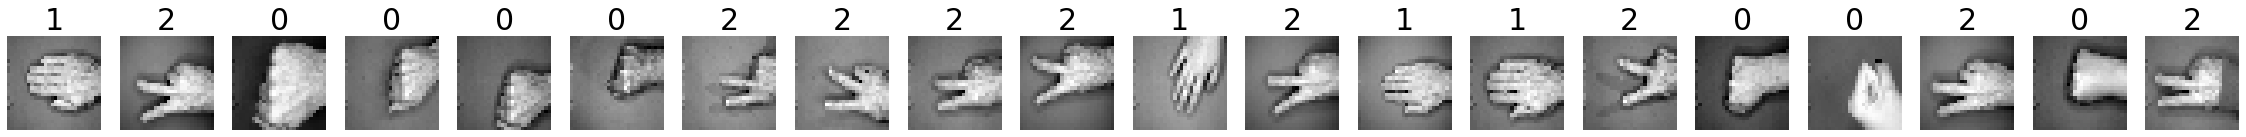

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## 資料前處理

### 正規化影像資料

In [10]:
# TODO：x_train 當中的最小值
x_train.min()

2

In [11]:
# TODO：x_train 當中的最大值
x_train.max()

251

In [12]:
# TODO: Normalize x_train and x_valid.
x_train_normalize = x_train / 255
x_valid_normalize = x_valid / 255

### 影像分類

In [13]:
# TODO：有幾個類別呢
import tensorflow.keras as keras
num_classes = 3

In [15]:
# TODO: Categorically encode y_train and y_valid.
y_train_class = keras.utils.to_categorical(y_train, num_classes)
y_valid_class = keras.utils.to_categorical(y_valid, num_classes)

## 模型

### 建立模型

We need...
* 具有密集輸入層。這一層包含 512 個神經元，使用 `relu` 激活函數，並接收形狀為 `(784,)` 的輸入影像。
* 具有第二個密集輸入層，含有 512 個使用 `relu` 激活函數的神經元
* 具有密集輸出層，其神經元的數量與類別數量相等，並使用 `softmax` 激活函數

還不熟悉，參考一下 MNIST 的範例吧～<br>
**建議可以多嘗試不同的層數！**

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [112]:
# TODO: 建立模型中的 layers.
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

### 總結模型

In [113]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               401920    
                                                                 
 dense_42 (Dense)            (None, 512)               262656    
                                                                 
 dense_43 (Dense)            (None, 512)               262656    
                                                                 
 dense_44 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 928,771
Trainable params: 928,771
Non-trainable params: 0
_________________________________________________________________


### 編寫模型

使用 [CategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

In [114]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### 訓練模型

使用模型的 `fit`方法來對模型進行訓練，使用的是先前建立的訓練與驗證影像和類別：

In [115]:
# TODO: Train the model.
history = model.fit(x_train_normalize, 
                    y_train_class, 
                    validation_split=1, 
                    epochs=20, 
                    verbose=1, 
                    batch_size=8, 
                    validation_data=(x_valid_normalize, y_valid_class))

Epoch 1/20
219/219 [==============================] - 3s 12ms/step - loss: 1.1150 - accuracy: 0.3671 - val_loss: 1.0829 - val_accuracy: 0.4191
Epoch 2/20
219/219 [==============================] - 2s 11ms/step - loss: 1.0452 - accuracy: 0.4603 - val_loss: 0.9584 - val_accuracy: 0.5877
Epoch 3/20
219/219 [==============================] - 2s 11ms/step - loss: 0.9650 - accuracy: 0.5512 - val_loss: 0.8178 - val_accuracy: 0.6788
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.9387 - accuracy: 0.5718 - val_loss: 0.8202 - val_accuracy: 0.6651
Epoch 5/20
219/219 [==============================] - 2s 11ms/step - loss: 0.8751 - accuracy: 0.6158 - val_loss: 0.7804 - val_accuracy: 0.6765
Epoch 6/20
219/219 [==============================] - 2s 11ms/step - loss: 0.8470 - accuracy: 0.6221 - val_loss: 0.8824 - val_accuracy: 0.5900
Epoch 7/20
219/219 [==============================] - 2s 11ms/step - loss: 0.8206 - accuracy: 0.6427 - val_loss: 0.8159 - val_accuracy: 0.6310

Model Loss Plot

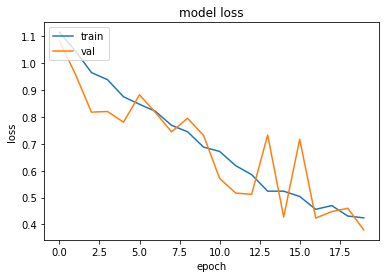

In [116]:
# TODO：繪製圖表觀察每個 epoch 對應的 model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model Accuracy Plot

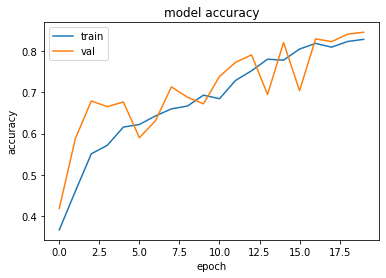

In [117]:
# TODO：繪製圖表觀察每個 epoch 對應的 model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix

14/14 [==============================] - 0s 2ms/step


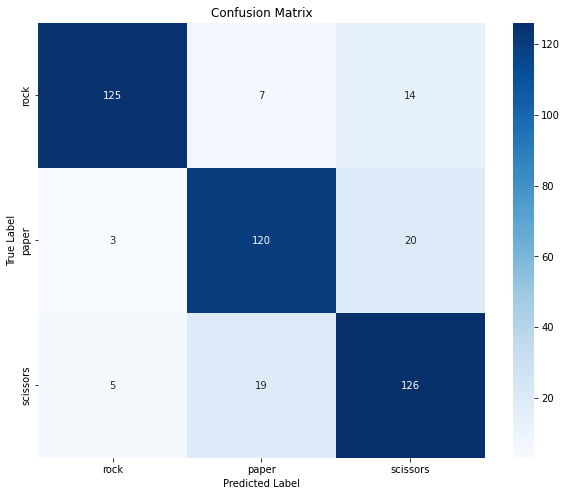

In [118]:
# TODO：繪製 Confusion Matrix 觀察模型在各個類別的預測表現
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_valid_normalize)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_valid_class, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

class_labels = ['rock', 'paper', 'scissors']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### 你可能會遇到的問題？（沒遇到也可以閱讀一下這篇文章）
https://ithelp.ithome.com.tw/m/articles/10203371

## 使用模型

### 儲存模型

In [120]:
# TODO
model.save("model/rps-ans.h5")

### 載入模型

In [121]:
# TODO
model_load = keras.models.load_model("model/rps-ans.h5")
model_load.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               401920    
                                                                 
 dense_42 (Dense)            (None, 512)               262656    
                                                                 
 dense_43 (Dense)            (None, 512)               262656    
                                                                 
 dense_44 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 928,771
Trainable params: 928,771
Non-trainable params: 0
_________________________________________________________________


### 預測圖像
先拿資料集當中的圖片來試試

查看圖像

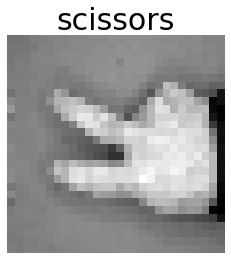

In [122]:
import matplotlib.pyplot as plt

row = x_valid[32]
label = y_valid[32]

# TODO 
def label_to_rps(num):
    mapping = {
        0: 'rock', 1: 'paper', 2: 'scissors'
    }
    return mapping.get(num, 'Invalid number')
###

image = row.reshape(28,28)
plt.title(label_to_rps(label), fontdict={'fontsize': 30})
plt.axis('off')
plt.imshow(image, cmap='gray')

查看圖像的資料型態

In [123]:
predict_img_origin = x_valid[32]
print(f"這張圖片的資料尺寸：{predict_img_origin.shape}") # TODO
print(f"這張圖片的資料型態：{predict_img_origin.dtype}") # TODO

這張圖片的資料尺寸：(784,)
這張圖片的資料型態：int64


圖像資料前處理

In [124]:
# TODO：用一行將圖像正規化、調整成模型要的輸入尺寸 (1,784)、轉換型態為 float32
predict_img = (predict_img_origin/255).reshape(1,784).astype("float32")
predict_img

array([[0.40784314, 0.4117647 , 0.41960785, 0.44313726, 0.44705883,
        0.45490196, 0.46666667, 0.4627451 , 0.4745098 , 0.47058824,
        0.47843137, 0.47843137, 0.47843137, 0.49411765, 0.4862745 ,
        0.49411765, 0.49411765, 0.49019608, 0.49019608, 0.4862745 ,
        0.47843137, 0.4862745 , 0.48235294, 0.4745098 , 0.47843137,
        0.45882353, 0.4627451 , 0.45882353, 0.41960785, 0.41960785,
        0.42352942, 0.43137255, 0.45490196, 0.45490196, 0.4627451 ,
        0.47058824, 0.4745098 , 0.47843137, 0.47843137, 0.4862745 ,
        0.49019608, 0.4862745 , 0.5019608 , 0.49019608, 0.5058824 ,
        0.49411765, 0.49803922, 0.49019608, 0.49019608, 0.49019608,
        0.47843137, 0.47843137, 0.47843137, 0.47058824, 0.46666667,
        0.4627451 , 0.41960785, 0.42745098, 0.43137255, 0.45490196,
        0.4627451 , 0.45882353, 0.4745098 , 0.47843137, 0.48235294,
        0.48235294, 0.48235294, 0.49803922, 0.49019608, 0.49411765,
        0.5019608 , 0.5019608 , 0.5019608 , 0.50

預測圖像

In [125]:
# TODO
import numpy as np

predictions = model_load.predict(predict_img)
predicted_classes = np.argmax(predictions, axis=1)

# TODO 
def label_to_rps(num):
    mapping = {
        0: 'rock', 1: 'paper', 2: 'scissors'
    }
    return mapping.get(num, 'Invalid number')
###

print(f"預測結果數值：{predictions}")
print(f"預測的結果類別：{label_to_rps(predicted_classes[0])}")

1/1 [==============================] - 0s 53ms/step
預測結果數值：[[0.01596459 0.01081783 0.97321755]]
預測的結果類別：scissors


### 預測自己拍攝的照片

載入與查看圖片

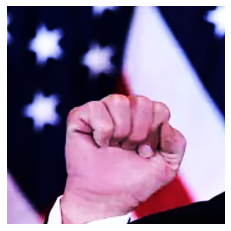

In [142]:
from PIL import Image
from matplotlib import pyplot as plt

image_dir = 'images/rock.png'
image = Image.open(image_dir)

plt.imshow(image)
plt.axis('off')  # 不顯示座標軸
plt.show()
# https://nypost.com/wp-content/uploads/sites/2/2020/11/AFP_Trump-Defiant-1.jpg?quality=75&strip=all&w=744

將圖像前處理

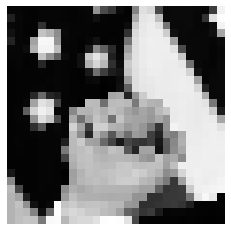

In [143]:
import cv2
import numpy as np

image = cv2.imread(image_dir)
image_resized = cv2.resize(image, (28, 28))
image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
predict_img = (image_gray/255).reshape(1,784).astype('float32')

plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

預測圖像

In [144]:
predictions = model_load.predict(predict_img)
predicted_classes = np.argmax(predictions, axis=1)

def label_to_rps(num):
    mapping = {
        0: 'rock', 1: 'paper', 2: 'scissors'
    }
    return mapping.get(num, 'Invalid number')


print(f"預測結果數值：{predictions}")
print(f"預測的結果類別：{label_to_rps(predicted_classes[0])}")

1/1 [==============================] - 0s 24ms/step
預測結果數值：[[0.49379015 0.48777297 0.01843682]]
預測的結果類別：rock
